In [1]:
import sys
sys.path.append('../')

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from architectures.LeNet5 import LeNet5
from src.helpers import Device, train

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# parameters
RANDOM_SEED = 42
LEARNING_RATE = 0.001
BATCH_SIZE = 32
N_EPOCHS = 15

IMG_SIZE = 32
N_CLASSES = 10

In [4]:
# define transforms
transforms = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor()])

In [5]:
# download and create datasets
train_dataset = datasets.MNIST(root='./mnist_data', 
                               train=True, 
                               transform=transforms,
                               download=True)

valid_dataset = datasets.MNIST(root='./mnist_data', 
                               train=False, 
                               transform=transforms)

In [6]:
# define the data loaders
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True)

valid_loader = DataLoader(dataset=valid_dataset, 
                          batch_size=100*BATCH_SIZE, 
                          shuffle=False)

# Training

In [35]:
torch.manual_seed(RANDOM_SEED)
device = Device().get()
model = LeNet5(N_CLASSES).to(device)

In [36]:
model

LeNet5(
  (feature_extractor): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (6): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
    (7): Tanh()
  )
  (classifier): Sequential(
    (0): Linear(in_features=120, out_features=84, bias=True)
    (1): Tanh()
    (2): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [37]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

22:39:16 --- Epoch: 0	Train loss: 0.2311	Valid loss: 0.0891	
22:39:40 --- Epoch: 1	Train loss: 0.0792	Valid loss: 0.0605	
22:40:04 --- Epoch: 2	Train loss: 0.0578	Valid loss: 0.0754	
22:40:28 --- Epoch: 3	Train loss: 0.0453	Valid loss: 0.0457	
22:40:53 --- Epoch: 4	Train loss: 0.0374	Valid loss: 0.0446	
22:41:17 --- Epoch: 5	Train loss: 0.0297	Valid loss: 0.0453	
22:41:41 --- Epoch: 6	Train loss: 0.0256	Valid loss: 0.0462	
22:42:05 --- Epoch: 7	Train loss: 0.0248	Valid loss: 0.0457	
22:42:29 --- Epoch: 8	Train loss: 0.0197	Valid loss: 0.0463	
22:42:53 --- Epoch: 9	Train loss: 0.0178	Valid loss: 0.0441	


../src/helpers.py:46: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


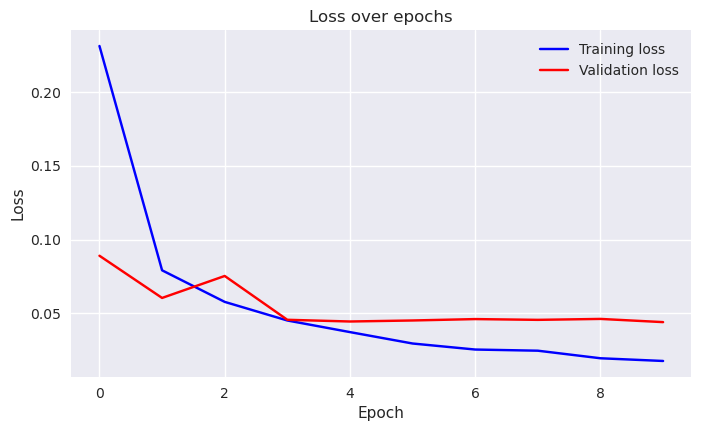

In [38]:
model, optimizer, _ = train(model, criterion, optimizer, train_loader, valid_loader, 10, device)